# Education Nationale

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import fiona
import folium
import numpy as np

%matplotlib inline

## Imports des datasets

### Géométrie

In [2]:
geo_path = "data/ADE_4-0_GPKG_WGS84G_FRA-ED2026-02-16.gpkg"

In [3]:
fiona.listlayers(geo_path)

['canton',
 'arrondissement',
 'arrondissement_municipal',
 'chef_lieu_d_arrondissement',
 'chef_lieu_d_arrondissement_municipal',
 'chef_lieu_de_canton',
 'chef_lieu_de_collectivite_territoriale',
 'chef_lieu_de_commune',
 'chef_lieu_de_commune_associee_ou_deleguee',
 'chef_lieu_de_departement',
 'chef_lieu_d_epci',
 'chef_lieu_de_region',
 'collectivite_territoriale',
 'commune',
 'commune_associee_ou_deleguee',
 'departement',
 'epci',
 'region',
 'info_metadonnees',
 'layer_styles']

In [4]:
layers = ["commune", "departement", "region"]

gdfs = {
	layer: gpd.read_file(
		geo_path,
		layer=layer
	)
	for layer in layers
}

geo_communes = gdfs["commune"]
geo_departements = gdfs["departement"]
geo_regions = gdfs["region"]

#### Communes

In [5]:
print(geo_communes.dtypes)

cleabs                                       str
nom_officiel                                 str
nom_officiel_en_majuscules                   str
statut                                       str
code_insee                                   str
population                                 int32
date_du_recensement               datetime64[ms]
organisme_recenseur                          str
code_insee_du_canton                         str
code_insee_de_l_arrondissement               str
code_insee_du_departement                    str
code_insee_de_la_region                      str
codes_siren_des_epci                         str
code_siren                                   str
code_postal                                  str
superficie_cadastrale                      int32
geometry                                geometry
dtype: object


In [6]:
geo_communes = geo_communes.rename(columns={"code_insee": "code_insee_de_la_commune"})
geo_communes = geo_communes.filter(items=["code_insee_de_la_commune",
						   "code_insee_du_departement",
						   "code_insee_de_la_region",
						   "nom_officiel",
						   "geometry"
						   ]
)
geo_communes.head()

,code_insee_de_la_commune,code_insee_du_departement,code_insee_de_la_region,nom_officiel,geometry
0,01001,01,84,L'Abergement-Clémenciat,"MULTIPOLYGON (((4.95841 46.15327, 4.95812 46.1..."
1,01002,01,84,L'Abergement-de-Varey,"MULTIPOLYGON (((5.4302 45.98277, 5.43012 45.98..."
2,01004,01,84,Ambérieu-en-Bugey,"MULTIPOLYGON (((5.40882 45.94206, 5.4085 45.94..."
3,01005,01,84,Ambérieux-en-Dombes,"MULTIPOLYGON (((4.94298 45.97962, 4.94257 45.9..."
4,01006,01,84,Ambléon,"MULTIPOLYGON (((5.57083 45.75338, 5.57219 45.7..."


#### Département

In [7]:
print(geo_departements.dtypes)

cleabs                             str
nom_officiel                       str
nom_officiel_en_majuscules         str
code_insee                         str
code_insee_de_la_region            str
code_siren                         str
geometry                      geometry
dtype: object


In [8]:
geo_departements = geo_departements.rename(columns={"code_insee": "code_insee_du_departement"})
geo_departements = geo_departements.filter(items=["code_insee_du_departement",
						   "code_insee_de_la_region",
						   "nom_officiel",
						   "geometry"
						   ]
)
geo_departements.head()

,code_insee_du_departement,code_insee_de_la_region,nom_officiel,geometry
0,92,11,Hauts-de-Seine,"MULTIPOLYGON (((2.17674 48.81401, 2.17571 48.8..."
1,07,84,Ardèche,"MULTIPOLYGON (((4.44035 44.2836, 4.44024 44.28..."
2,95,11,Val-d'Oise,"MULTIPOLYGON (((2.58298 49.08066, 2.58336 49.0..."
3,63,84,Puy-de-Dôme,"MULTIPOLYGON (((2.49665 45.55686, 2.49657 45.5..."
4,76,28,Seine-Maritime,"MULTIPOLYGON (((0.71452 49.40998, 0.71447 49.4..."


#### Régions

In [9]:
print(geo_regions.dtypes)

cleabs                             str
nom_officiel                       str
nom_officiel_en_majuscules         str
code_insee                         str
code_siren                         str
geometry                      geometry
dtype: object


In [10]:
geo_regions = geo_regions.rename(columns={"code_insee": "code_insee_de_la_region"})
geo_regions = geo_regions.filter(items=["code_insee_de_la_region",
						   "nom_officiel",
						   "geometry"
						   ]
)
geo_regions.head()

,code_insee_de_la_region,nom_officiel,geometry
0,53,Bretagne,"MULTIPOLYGON (((-5.00711 48.41601, -5.0071 48...."
1,84,Auvergne-Rhône-Alpes,"MULTIPOLYGON (((4.92706 46.49932, 4.92739 46.5..."
2,44,Grand Est,"MULTIPOLYGON (((3.64051 48.18462, 3.64011 48.1..."
3,11,Île-de-France,"MULTIPOLYGON (((1.62057 48.73609, 1.62131 48.7..."
4,93,Provence-Alpes-Côte d'Azur,"MULTIPOLYGON (((5.39436 43.17006, 5.39437 43.1..."


### IPS

In [11]:
ips_ecoles_path = "data/donnees-ips-ecoles.csv"

In [12]:
data_ips_ecoles = pd.read_csv(ips_ecoles_path, delimiter=";")
print(data_ips_ecoles.dtypes)

rentree_scolaire                str
code_region                   int64
region                          str
code_de_l_academie            int64
academie                        str
code_du_departement         float64
departement                     str
code_insee_de_la_commune        str
nom_de_la_commune               str
uai                             str
secteur                         str
ips                         float64
ips_national_prive          float64
ips_national_public         float64
ips_national                float64
ips_academique_prive        float64
ips_academique_public       float64
ips_academique              float64
ips_departemental_prive     float64
ips_departemental_public    float64
ips_departemental           float64
num_ligne                   float64
appellation_officielle          str
libelle_commune                 str
code_departement                str
code_commune                    str
libelle_departement             str
libelle_academie            

In [13]:
data_ips_ecoles = data_ips_ecoles.filter(items=[
	"rentree_scolaire",
	"code_insee_de_la_commune",
	"secteur",
	"ips",
	"academie"
	]
)
data_ips_ecoles.head()

,rentree_scolaire,code_insee_de_la_commune,secteur,ips,academie
0,2023-2024,29190,public,127.9,RENNES
1,2023-2024,73137,public,128.4,GRENOBLE
2,2023-2024,48067,public,NaN,MONTPELLIER
3,2023-2024,83137,public,107.0,NICE
4,2023-2024,29232,public,103.5,RENNES


In [14]:
data_ips_ecoles_annees = data_ips_ecoles.groupby("rentree_scolaire")
data_ips_ecoles = data_ips_ecoles_annees.get_group("2023-2024").drop(columns=["rentree_scolaire"])
data_ips_ecoles.head()

,code_insee_de_la_commune,secteur,ips,academie
0,29190,public,127.9,RENNES
1,73137,public,128.4,GRENOBLE
2,48067,public,NaN,MONTPELLIER
3,83137,public,107.0,NICE
4,29232,public,103.5,RENNES


## Histogrammes

<Axes: >

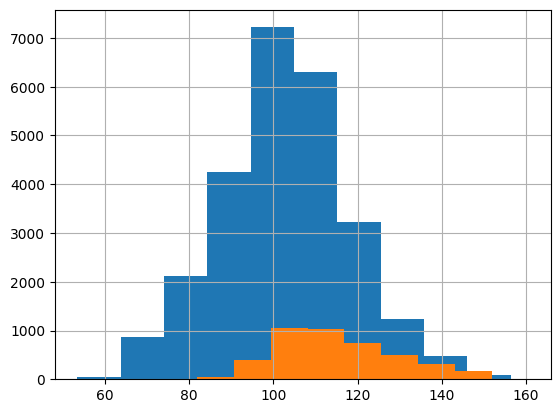

In [15]:
secteurs = data_ips_ecoles.groupby("secteur")
secteurs.get_group("public")["ips"].hist()
secteurs.get_group("privé sous contrat")["ips"].hist()

In [16]:
academies = data_ips_ecoles.groupby("academie")
academies["ips"].mean().sort_values()

academie
MAYOTTE              75.273109
GUYANE               82.078992
LA REUNION           85.552187
GUADELOUPE           95.310588
REIMS                97.323044
LILLE                98.090010
MARTINIQUE           98.114667
AMIENS               99.054201
BESANCON            100.876901
NANCY-METZ          101.260639
NORMANDIE           101.899467
CORSE               102.231933
DIJON               102.599112
ORLEANS-TOURS       102.755878
LIMOGES             102.932174
POITIERS            103.070842
CLERMONT-FERRAND    103.173913
CRETEIL             103.653472
MONTPELLIER         103.862685
NANTES              104.805712
STRASBOURG          104.848514
BORDEAUX            105.611204
AIX-MARSEILLE       105.635701
NICE                105.752994
RENNES              107.149808
TOULOUSE            107.859973
LYON                108.488307
GRENOBLE            109.518156
VERSAILLES          115.611845
PARIS               123.295056
Name: ips, dtype: float64

<Axes: >

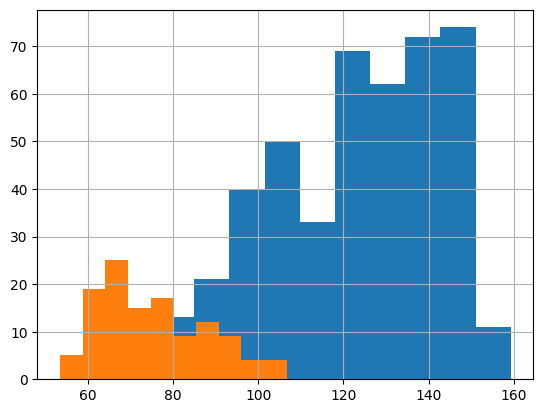

In [17]:
academies.get_group("PARIS")["ips"].hist()
academies.get_group("MAYOTTE")["ips"].hist()

<Axes: >

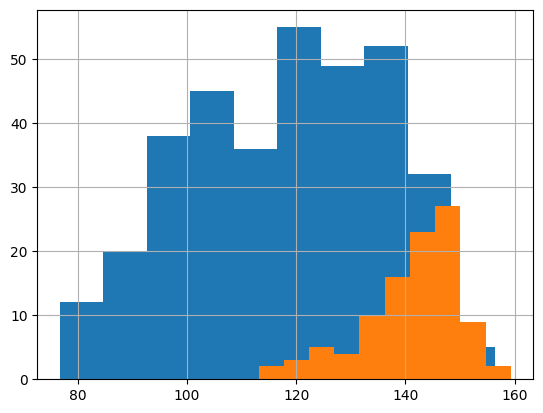

In [18]:
academie_PARIS_secteurs = academies.get_group("PARIS").groupby("secteur")
academie_PARIS_secteurs.get_group("public")["ips"].hist()
academie_PARIS_secteurs.get_group("privé sous contrat")["ips"].hist()

## Cartes

### Communes

In [19]:
data_ips_ecoles_par_codes_insee_de_la_commune = data_ips_ecoles.groupby("code_insee_de_la_commune")
data_ips_ecoles_par_codes_insee_de_la_commune.get_group("29190")

,code_insee_de_la_commune,secteur,ips,academie
0,29190,public,127.9,RENNES
14236,29190,public,127.9,RENNES
26768,29190,privé sous contrat,114.9,RENNES


In [20]:
data_ips_ecoles_communes = data_ips_ecoles_par_codes_insee_de_la_commune["ips"].mean().reset_index()
data_ips_ecoles_communes.head()

,code_insee_de_la_commune,ips
0,01001,104.500
1,01004,100.575
2,01005,113.700
3,01007,109.400
4,01008,110.700


In [21]:
data_ips_ecoles_geo_communes = geo_communes.merge(data_ips_ecoles_communes,
												  left_on="code_insee_de_la_commune",
												  right_on="code_insee_de_la_commune",
												  how="left"
												  )
data_ips_ecoles_geo_communes.head()

,code_insee_de_la_commune,code_insee_du_departement,code_insee_de_la_region,nom_officiel,geometry,ips
0,01001,01,84,L'Abergement-Clémenciat,"MULTIPOLYGON (((4.95841 46.15327, 4.95812 46.1...",104.500
1,01002,01,84,L'Abergement-de-Varey,"MULTIPOLYGON (((5.4302 45.98277, 5.43012 45.98...",NaN
2,01004,01,84,Ambérieu-en-Bugey,"MULTIPOLYGON (((5.40882 45.94206, 5.4085 45.94...",100.575
3,01005,01,84,Ambérieux-en-Dombes,"MULTIPOLYGON (((4.94298 45.97962, 4.94257 45.9...",113.700
4,01006,01,84,Ambléon,"MULTIPOLYGON (((5.57083 45.75338, 5.57219 45.7...",NaN


In [22]:
print("Nombre total:", len(data_ips_ecoles_geo_communes))
print("Géométries manquantes:", data_ips_ecoles_geo_communes.geometry.isna().sum())
print("IPS manquants:", data_ips_ecoles_geo_communes["ips"].isna().sum())
# data_ips_ecoles_geo_communes = data_ips_ecoles_geo_communes.dropna(subset=["geometry"])
# data_ips_ecoles_geo_communes = data_ips_ecoles_geo_communes.dropna(subset=["ips"])

Nombre total: 34877
Géométries manquantes: 0
IPS manquants: 18740


In [23]:
print("Nombre total:", len(data_ips_ecoles_geo_communes))
print("Géométries manquantes:", data_ips_ecoles_geo_communes.geometry.isna().sum())
print("IPS manquants:", data_ips_ecoles_geo_communes["ips"].isna().sum())
# data_ips_ecoles_geo_communes = data_ips_ecoles_geo_communes.dropna(subset=["geometry"])
# data_ips_ecoles_geo_communes = data_ips_ecoles_geo_communes.dropna(subset=["ips"])

Nombre total: 34877
Géométries manquantes: 0
IPS manquants: 18740


In [24]:
data_ips_ecoles_geo_communes_dept_28 = data_ips_ecoles_geo_communes[data_ips_ecoles_geo_communes['code_insee_du_departement'] == '28']

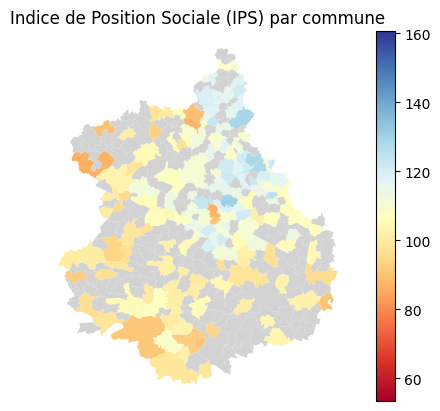

In [25]:
data_ips_ecoles_geo_communes_dept_28.plot(
	column="ips",
	cmap="RdYlBu",
	vmin=data_ips_ecoles["ips"].min(),
	vmax=data_ips_ecoles["ips"].max(),
	legend=True,
	missing_kwds={"color": "lightgrey"}
)
plt.title("Indice de Position Sociale (IPS) par commune")
plt.axis("off")
plt.show()

In [26]:
map_communes_28 = data_ips_ecoles_geo_communes_dept_28.explore(
	column="ips",
	cmap="RdYlBu",
	vmin=data_ips_ecoles["ips"].min(),
	vmax=data_ips_ecoles["ips"].max(),
	legend=True,
	tooltip=["nom_officiel", "ips"],
	missing_kwds={"color": "lightgrey"}
)

In [27]:
map_communes_28.save("map_communes_28.html")

### Départements

In [28]:
data_ips_ecoles_geo_communes_par_departement = data_ips_ecoles_geo_communes.groupby("code_insee_du_departement")
data_ips_ecoles_departements = data_ips_ecoles_geo_communes_par_departement["ips"].mean().reset_index()
data_ips_ecoles_departements.head()


,code_insee_du_departement,ips
0,01,109.333121
1,02,95.406201
2,03,98.687342
3,04,106.322663
4,05,110.051168


In [29]:
data_ips_ecoles_geo_departements = geo_departements.merge(data_ips_ecoles_departements,
														 left_on="code_insee_du_departement",
														 right_on="code_insee_du_departement",
														 how="left"
														 )
data_ips_ecoles_geo_departements.head()

,code_insee_du_departement,code_insee_de_la_region,nom_officiel,geometry,ips
0,92,11,Hauts-de-Seine,"MULTIPOLYGON (((2.17674 48.81401, 2.17571 48.8...",127.271194
1,07,84,Ardèche,"MULTIPOLYGON (((4.44035 44.2836, 4.44024 44.28...",105.033163
2,95,11,Val-d'Oise,"MULTIPOLYGON (((2.58298 49.08066, 2.58336 49.0...",116.418610
3,63,84,Puy-de-Dôme,"MULTIPOLYGON (((2.49665 45.55686, 2.49657 45.5...",107.754837
4,76,28,Seine-Maritime,"MULTIPOLYGON (((0.71452 49.40998, 0.71447 49.4...",103.061254


In [30]:
print("Nombre total:", len(data_ips_ecoles_geo_departements))
print("Géométries manquantes:", data_ips_ecoles_geo_departements.geometry.isna().sum())
print("IPS manquants:", data_ips_ecoles_geo_departements["ips"].isna().sum())

Nombre total: 101
Géométries manquantes: 0
IPS manquants: 1


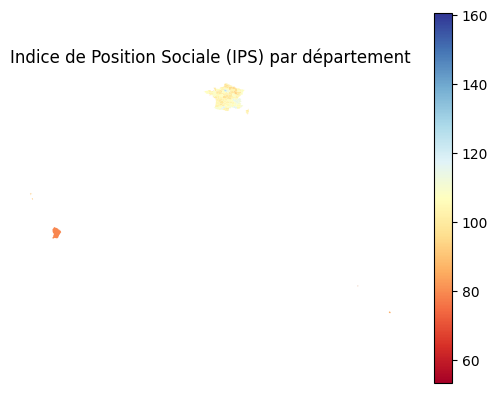

In [31]:
data_ips_ecoles_geo_departements.plot(
	column="ips",
	cmap="RdYlBu",
	vmin=data_ips_ecoles["ips"].min(),
	vmax=data_ips_ecoles["ips"].max(),
	legend=True,
	missing_kwds={"color": "lightgrey"}
)
plt.title("Indice de Position Sociale (IPS) par département")
plt.axis("off")
plt.show()

In [32]:
map_departements = data_ips_ecoles_geo_departements.explore(
	column="ips",
	cmap="RdYlBu",
	vmin=data_ips_ecoles["ips"].min(),
	vmax=data_ips_ecoles["ips"].max(),
	legend=True,
	tooltip=["nom_officiel", "ips"],
	missing_kwds={"color": "lightgrey"}
)

In [33]:
map_departements.save("map_departements.html")